CARICO DI CONDUZIONE DEL CONNETTORE IN RAME CHE CONNETTE 2 STADIO DEL PULSE TUBE CON PIATTO 4K 

RRR=50

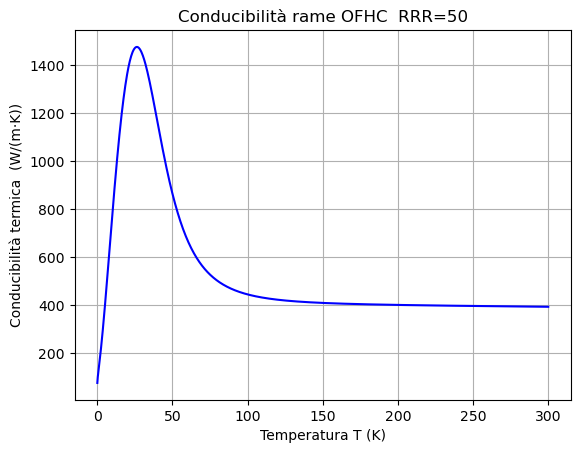

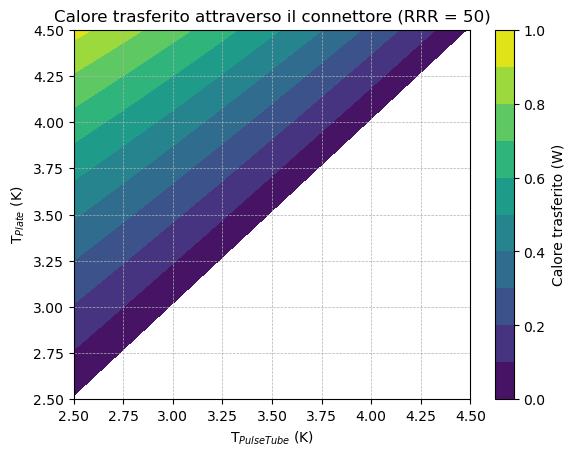

L'integrale di conduzione tra 2.9 K e 4 K è: 311.5524 W/m
Carico con T_min=2.9 e T_max=4 :   Q = 5.0627e-01 W


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a=1.8743
b=-0.41538
c=-0.6018
d=0.13294
e=0.26426
f=-0.0219
g=-0.051276
h=0.0014871
i=0.003723

# Funzione conducibilità vs Temperatura
def conductivity(T):
    logT = np.log10(T)
    return 10**( (a + c * T**0.5 + e * T + g * T**1.5 + i * T**2) / (1 + b * T**0.5 + d * T + f * T**1.5 + h * T**2) )

    
#--------GRAFICO DI CONDUCIBILITà----------------
# Intervallo di temperatura
T_range = np.linspace(0.00000001, 300, 1000) # estensione della curva anche fuori dal dominio del NIST (4-300)

# Valori di y calcolati
y_values = conductivity(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità rame OFHC  RRR=50')
plt.xlabel('Temperatura T (K)')
plt.ylabel('Conducibilità termica  (W/(m·K))')
plt.grid(True)
plt.savefig("Conducibilità_connettore_RRR50.pdf", format="pdf")
plt.show()


#--------------------- PLOT 3D ( x=T1, y=T2, z=Q ) con A/l fissato ----------------------------

# Calcola l'integrale tra gli estremi x e y
def compute_integral(x, y):
    result, _ = quad(conductivity, x, y)
    return result

# Parametri geometrici
thickness = 1.3e-3 # spessore
width =  12.5e-2 # larghezza
l = 10e-2 # lunghezza  

A = thickness*width

# Genera dati per x e y
x_vals = np.linspace(2.5, 4.5, 100) # vals sta per valori, 0.00001 cosi non divido per zero, T_PulseTube
y_vals = np.linspace(2.5, 4.5, 100) # T_Plate

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(x_vals), len(y_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(x_vals):
    for m, y in enumerate(y_vals):
        if x < y:  # T_pt < T_pl per motivi fisici
            z_vals[n, m] = A/l * compute_integral(x, y)  # Usa x e y come estremi
        else:
            z_vals[n, m] = np.nan  # Evita integrali con x > y

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z_vals.T, levels=10, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Calore trasferito (W)')

# Etichette e titolo
plt.xlabel(r'T$_{Pulse Tube}$ (K)')
plt.ylabel(r'T$_{Plate}$ (K)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Linee tratteggiate
plt.title("Calore trasferito attraverso il connettore (RRR = 50)")
plt.savefig("3D_connettore_RRR50.pdf", format="pdf")
plt.show()

#----------CARICO TERMICO SCELTA T-------------
T_min = 2.9
T_max = 4

# Integrazione
integral_value, error = quad(conductivity, T_min, T_max)
print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Calcolo di Q
Q = A/l * integral_value      

# Output del risultato
print(f"Carico con T_min={T_min} e T_max={T_max} :   Q = {Q:.4e} W")




OSS: teoricmante a 2.9 K la potenza frigorifera del PT407 < 300 mW... quindi in realtà non limita nulla il connettore...secondo i miei calcoli

- RRR = 100

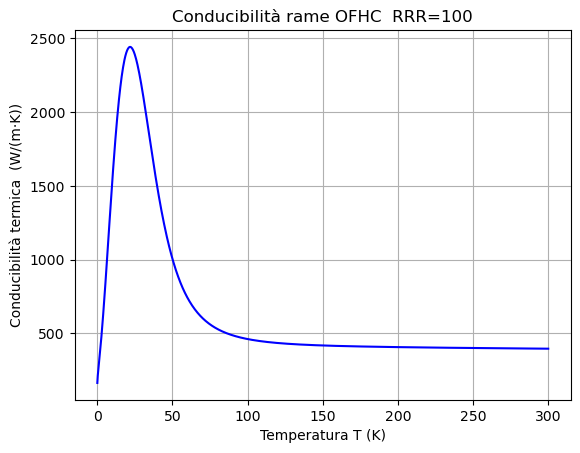

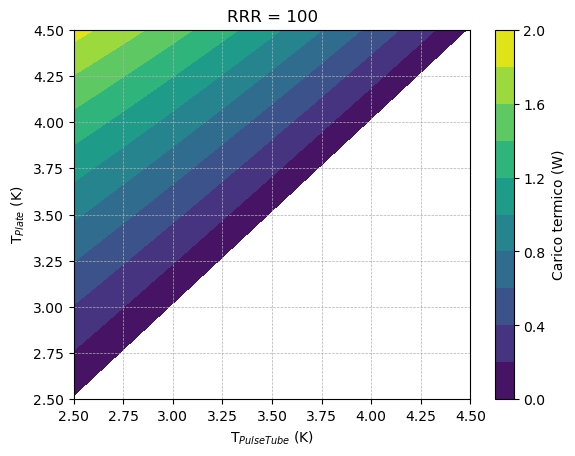

L'integrale di conduzione tra 2.9 K e 4 K è: 626.5660 W/m
Carico con T_min=2.9 e T_max=4 :   Q = 1.0182e+00 W


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = 2.2154
b = -0.47461
c = -0.88068
d = 0.13871
e = 0.29505
f = -0.02043
g = -0.04831
h = 0.001281
i = 0.003207


# Funzione conducibilità vs Temperatura
def conductivity(T):
    logT = np.log10(T)
    return 10**( (a + c * T**0.5 + e * T + g * T**1.5 + i * T**2) / (1 + b * T**0.5 + d * T + f * T**1.5 + h * T**2) )

    
#--------GRAFICO DI CONDUCIBILITà----------------
# Intervallo di temperatura
T_range = np.linspace(0.00000001, 300, 1000) # estensione della curva anche fuori dal dominio del NIST (4-300)

# Valori di y calcolati
y_values = conductivity(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità rame OFHC  RRR=100')
plt.xlabel('Temperatura T (K)')
plt.ylabel('Conducibilità termica  (W/(m·K))')
plt.grid(True)
plt.savefig("Conducibilità_connettore_RRR100.pdf", format="pdf")
plt.show()



#--------------------- PLOT 3D ( x=T1, y=T2, z=Q ) con A/l fissato ----------------------------

# Calcola l'integrale tra gli estremi x e y
def compute_integral(x, y):
    result, _ = quad(conductivity, x, y)
    return result

# Parametri geometrici
thickness = 1.3e-3 # spessore
width =  12.5e-2 # larghezza
l = 10e-2 # lunghezza  

A = thickness*width

# Genera dati per x e y
x_vals = np.linspace(2.5, 4.5, 100) # vals sta per valori, 0.00001 cosi non divido per zero, T_PulseTube
y_vals = np.linspace(2.5, 4.5, 100) # T_Plate

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(x_vals), len(y_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(x_vals):
    for m, y in enumerate(y_vals):
        if x < y:  # T_pt < T_pl per motivi fisici
            z_vals[n, m] = A/l * compute_integral(x, y)  # Usa x e y come estremi
        else:
            z_vals[n, m] = np.nan  # Evita integrali con x > y

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z_vals.T, levels=10, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Carico termico (W)')

# Etichette e titolo
plt.xlabel(r'T$_{Pulse Tube}$ (K)')
plt.ylabel(r'T$_{Plate}$ (K)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Linee tratteggiate
plt.title("RRR = 100")
plt.savefig("3D_connettore_RRR100.pdf", format="pdf")
plt.show()

"""#RADDOPPIO SPESSORE
width =  12.5e-2*2 # larghezza
A = thickness*width

# Genera dati per x e y
x_vals = np.linspace(2.5, 4.5, 100) # vals sta per valori, 0.00001 cosi non divido per zero, T_PulseTube
y_vals = np.linspace(2.5, 4.5, 100) # T_Plate

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(x_vals), len(y_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(x_vals):
    for m, y in enumerate(y_vals):
        if x < y:  # T_pt < T_pl per motivi fisici
            z_vals[n, m] = A/l * compute_integral(x, y)  # Usa x e y come estremi
        else:
            z_vals[n, m] = np.nan  # Evita integrali con x > y

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z_vals.T, levels=10, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Carico termico (W)')

# Etichette e titolo
plt.xlabel(r'T$_{Pulse Tube}$ (K)')
plt.ylabel(r'T$_{Plate}$ (K)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Linee tratteggiate
plt.title("RRR = 100 con spessore raddoppiato")
plt.savefig("3D_connettore_RRR100_2xspessore.pdf", format="pdf")
plt.show()"""

#----------CARICO TERMICO SCELTA T-------------
T_min = 2.9
T_max = 4

# Integrazione
integral_value, error = quad(conductivity, T_min, T_max)
print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Calcolo di Q
Q = A/l * integral_value      

# Output del risultato
print(f"Carico con T_min={T_min} e T_max={T_max} :   Q = {Q:.4e} W")

- RRR = 150


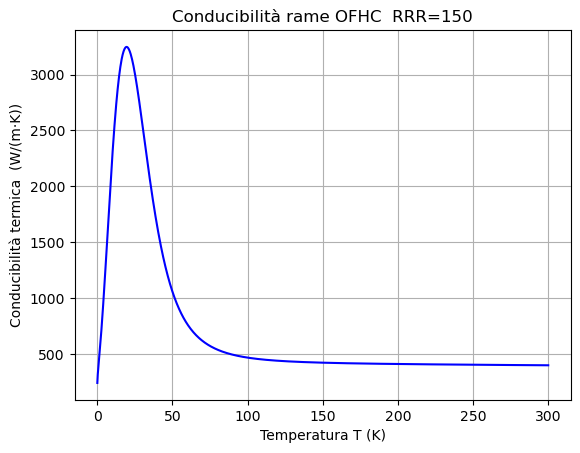

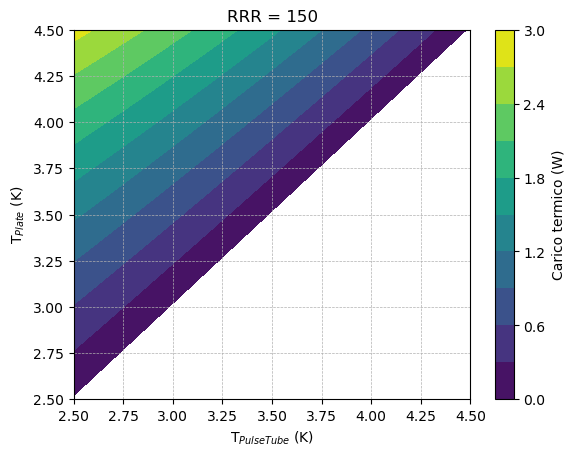

L'integrale di conduzione tra 2.9 K e 4 K è: 937.7484 W/m
Carico con T_min=2.9 e T_max=4 :   Q = 1.5238e+00 W


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = 2.3797
b = -0.4918
c = -0.98615
d = 0.13942
e = 0.30475
f = -0.019713
g = -0.046897
h = 0.0011969
i = 0.0029988


# Funzione conducibilità vs Temperatura
def conductivity(T):
    logT = np.log10(T)
    return 10**( (a + c * T**0.5 + e * T + g * T**1.5 + i * T**2) / (1 + b * T**0.5 + d * T + f * T**1.5 + h * T**2) )

    
#--------GRAFICO DI CONDUCIBILITà----------------
# Intervallo di temperatura
T_range = np.linspace(0.00000001, 300, 1000) # estensione della curva anche fuori dal dominio del NIST (4-300)

# Valori di y calcolati
y_values = conductivity(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità rame OFHC  RRR=150')
plt.xlabel('Temperatura T (K)')
plt.ylabel('Conducibilità termica  (W/(m·K))')
plt.grid(True)
plt.savefig("Conducibilità_connettore_RRR150.pdf", format="pdf")
plt.show()



#--------------------- PLOT 3D ( x=T1, y=T2, z=Q ) con A/l fissato ----------------------------

# Calcola l'integrale tra gli estremi x e y
def compute_integral(x, y):
    result, _ = quad(conductivity, x, y)
    return result

# Parametri geometrici
thickness = 1.3e-3 # spessore
width =  12.5e-2 # larghezza
l = 10e-2 # lunghezza  

A = thickness*width

# Genera dati per x e y
x_vals = np.linspace(2.5, 4.5, 100) # vals sta per valori, 0.00001 cosi non divido per zero, T_PulseTube
y_vals = np.linspace(2.5, 4.5, 100) # T_Plate

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(x_vals), len(y_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(x_vals):
    for m, y in enumerate(y_vals):
        if x < y:  # T_pt < T_pl per motivi fisici
            z_vals[n, m] = A/l * compute_integral(x, y)  # Usa x e y come estremi
        else:
            z_vals[n, m] = np.nan  # Evita integrali con x > y

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z_vals.T, levels=10, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Carico termico (W)')

# Etichette e titolo
plt.xlabel(r'T$_{Pulse Tube}$ (K)')
plt.ylabel(r'T$_{Plate}$ (K)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Linee tratteggiate
plt.title("RRR = 150")
plt.savefig("3D_connettore_RRR150.pdf", format="pdf")
plt.show()

#----------CARICO TERMICO SCELTA T-------------
T_min = 2.9
T_max = 4

# Integrazione
integral_value, error = quad(conductivity, T_min, T_max)
print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Calcolo di Q
Q = A/l * integral_value      

# Output del risultato
print(f"Carico con T_min={T_min} e T_max={T_max} :   Q = {Q:.4e} W")